# Logistic regression for image classification

## Demo: Logistic regression for classification of handwritten digits



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the digits dataset

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

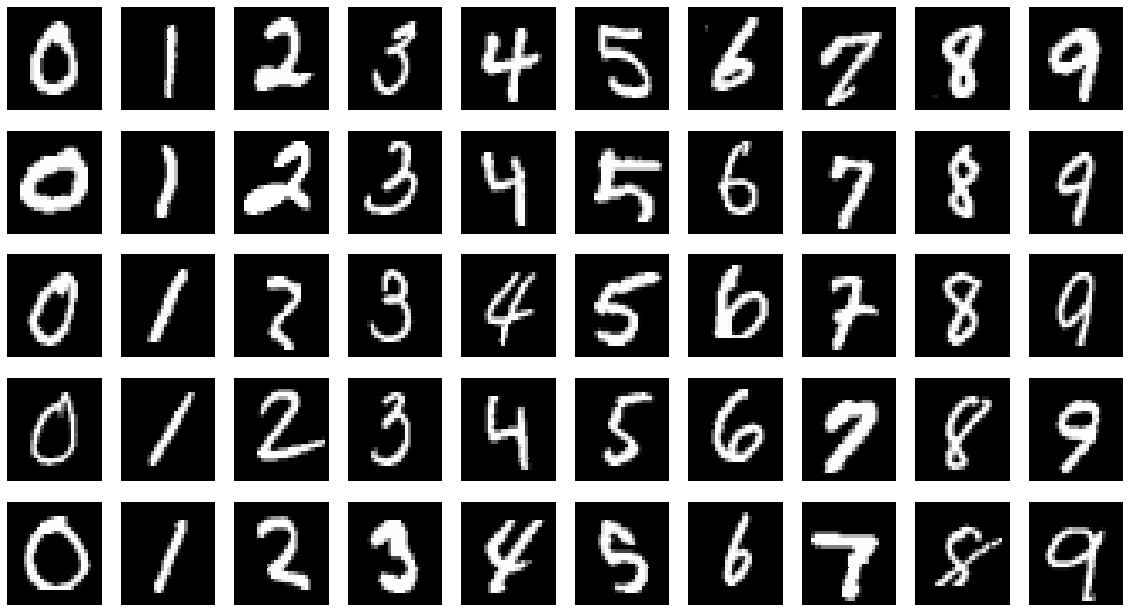

In [ ]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)));

for idx_cls, cls in enumerate(classes):
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');

### Prepare data


Since the dataset is very large, it can take a long time to train a classifier on it. We just want to use it to demonstrate some useful concepts, so we will work with a smaller subset of the dataset. When we split the data using the `train_test_split` function, we will specify that we want 7,500 samples in the training set and 2,500 samples in the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9,
                                     train_size=7500, test_size=2500)

We'll also scale the data so that each feature takes on a value between 0 and 1. 

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

### Train a classifier using logistic regression

tolerance, which gives stopping criteria for the solver. A higher tolerance will finish faster, but may not find the optimal solution.



In [ ]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

### Classify my own test sample

The following cell will download *my* test sample from an image hosting service:

In [ ]:
!wget https://i.imgur.com/YbX6NGJ.jpg -O 20200710_115731.jpg

--2020-07-26 02:23:16--  https://i.imgur.com/YbX6NGJ.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.36.193
Connecting to i.imgur.com (i.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27037 (26K) [image/jpeg]
Saving to: ‘20200710_115731.jpg’

20200710_115731.jpg 100%[===================>]  26.40K  --.-KB/s    in 0.004s  

2020-07-26 02:23:16 (6.66 MB/s) - ‘20200710_115731.jpg’ saved [27037/27037]



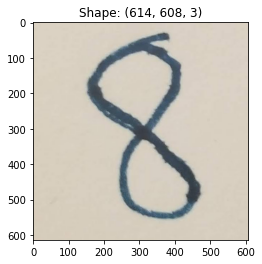

In [ ]:
from PIL import Image
 
filename = '20200710_115731.jpg'
 
image = Image.open(filename).convert('RGB')
p = plt.imshow(np.asarray(image), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image).shape))

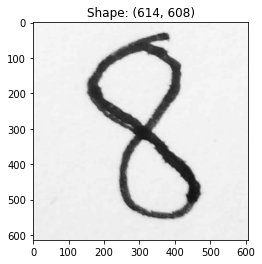

In [ ]:
# convert to grayscale image - 'L' format means each pixel is 
# represented by a single value from 0 to 255
image_bw = image.convert('L')
p = plt.imshow(np.asarray(image_bw), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw).shape))

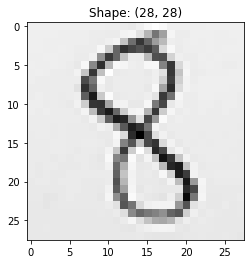

In [ ]:
# resize image 
image_bw_resized = image_bw.resize((28,28), Image.ANTIALIAS)
p = plt.imshow(np.asarray(image_bw_resized), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized).shape))

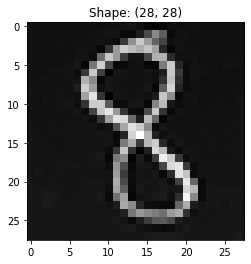

In [ ]:
# invert image, to match training data
import PIL.ImageOps    

image_bw_resized_inverted = PIL.ImageOps.invert(image_bw_resized)
p = plt.imshow(np.asarray(image_bw_resized_inverted), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted).shape))

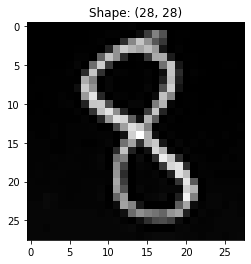

In [ ]:
# adjust contrast and scale
pixel_filter = 20 # value from 0 to 100 - may need to adjust this manually
min_pixel = np.percentile(image_bw_resized_inverted, pixel_filter)
image_bw_resized_inverted_scaled = np.clip(image_bw_resized_inverted-min_pixel, 0, 255)
max_pixel = np.max(image_bw_resized_inverted)
image_bw_resized_inverted_scaled = np.asarray(image_bw_resized_inverted_scaled)/max_pixel
p = plt.imshow(np.asarray(image_bw_resized_inverted_scaled), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted_scaled).shape))

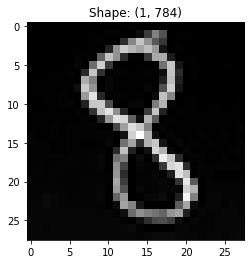

In [ ]:
# finally, reshape to (1, 784) - 1 sample, 784 features
test_sample = np.array(image_bw_resized_inverted_scaled).reshape(1,784)
p = plt.imshow(np.reshape(test_sample, (28,28)), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(test_sample.shape))

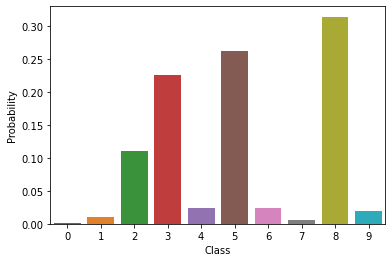

In [ ]:
test_probs = clf.predict_proba(test_sample)

sns.barplot(np.arange(0,10), test_probs.squeeze());
plt.ylabel("Probability");
plt.xlabel("Class");

In [ ]:
test_pred = clf.predict(test_sample)
print("Predicted class is: ", test_pred)

Predicted class is:  ['8']


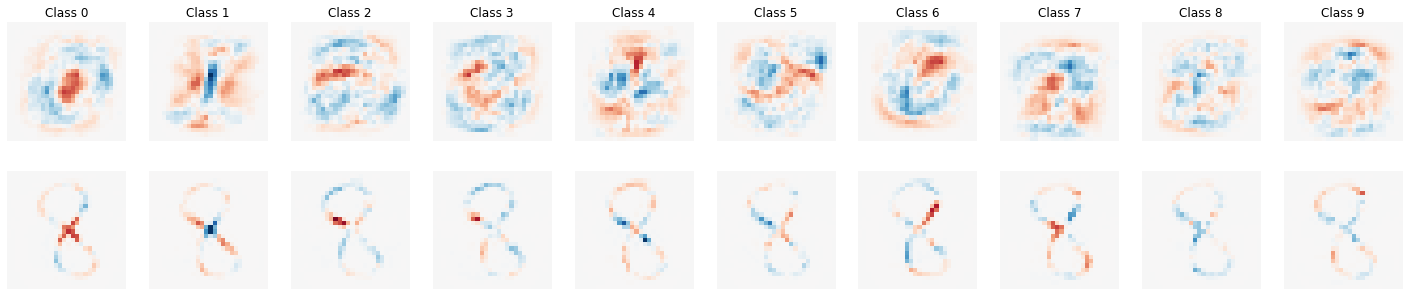

In [ ]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 5));

for i in range(nclasses):
    p = plt.subplot(2, nclasses, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.title('Class %i' % i);
    p = plt.axis('off')

for i in range(nclasses):
    p = plt.subplot(2, nclasses, nclasses + i + 1)
    p = plt.imshow(test_sample.reshape(28, 28)*clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale/2, vmax=scale/2);
    # note: you can adjust the scaling factor if necessary,
    # to make the visualization easier to understand
    p = plt.axis('off')

My sample was correctly classified as an '8'. The image in the bottom row under the "Class 8" heading shows that my sample had writing in the pixels that are positively associated with belonging to the '8' class. There are shown in blue. Also, my sample did not have much writing in pixels that have a strong negative association with belonging to the '8' class (not many red pixels, and they are not dark red).


 My sample was predicted as also having a moderate probability of belonging to the '5' or '3' class, and to a lesser extent, the '2' class. 

*   The '8' has a lot of overlap with the '5', but my sample has writing in the area at the top right of the digit (between the horizontal line at the top of the 5 and the curve at the bottom). Writing in this area is negatively associated with belonging to the '5' class.
*    Similarly, the '8' has a lot of overlap with the '3', but my sample has writing in the areas on the left side where the '3' has semi-circles but the 8 has circles.  Writing in this area is negatively associated with belonging to the '3' class.
* My sample has less overlap with the '2', and also has writing in the area on the left side that is negatively associated with belonging to the '2' class.

